In [4]:
library('kedd')
library('np')

Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-2)
[vignette("np_faq",package="np") provides answers to frequently asked questions]


In [10]:
options(repr.plot.width = 4, repr.plot.height = 3)

## Ядерные оценки плотности

Полная документация с примерами https://cran.r-project.org/web/packages/kedd/vignettes/kedd.pdf

Ядра. Параметр `deriv.order` --- порядок производной, по умолчанию 0.

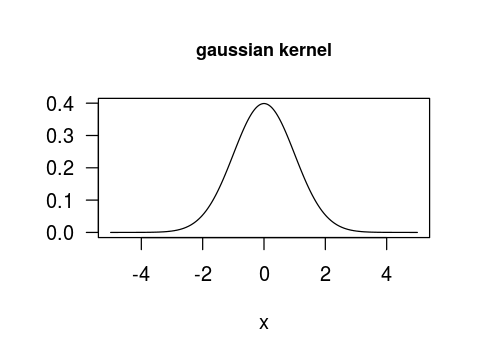

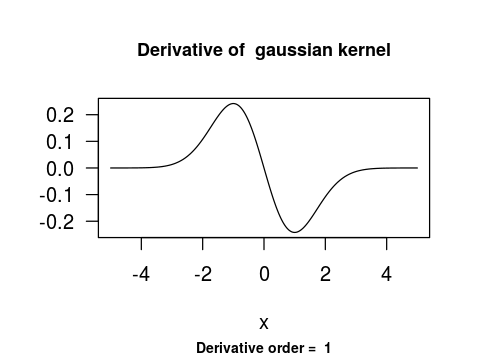

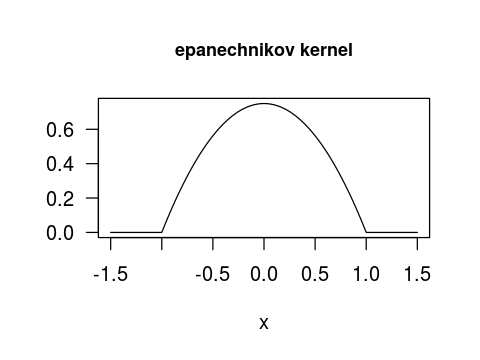

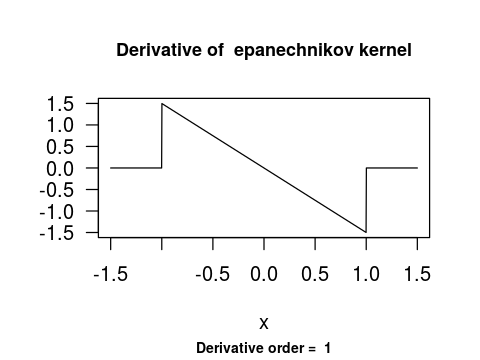

In [18]:
plot(kernel.fun(kernel = "gaussian"))
plot(kernel.fun(kernel = "gaussian", deriv.order = 1))
plot(kernel.fun(kernel = "epanechnikov"))
plot(kernel.fun(kernel = "epanechnikov", deriv.order = 1))

In [40]:
options(repr.plot.width = 7, repr.plot.height = 5)

Сгенерируем выборку

In [56]:
sample <- runif(n = 100)

Оценка плотности при помощи гауссовского ядра


Data: sample (100 obs.);	Kernel: gaussian

Derivative order: 0;	Bandwidth 'h' = 0.05739

  eval.points          est.fx         
 Min.   :-0.2182   Min.   :0.0000616  
 1st Qu.: 0.1412   1st Qu.:0.3134663  
 Median : 0.5006   Median :0.8577703  
 Mean   : 0.5006   Mean   :0.6942424  
 3rd Qu.: 0.8600   3rd Qu.:0.9804313  
 Max.   : 1.2194   Max.   :1.4056687  

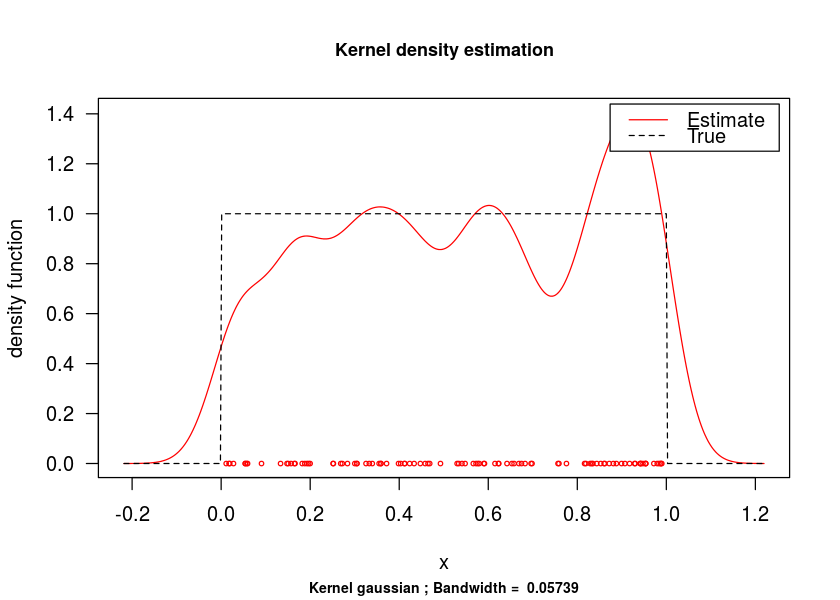

In [86]:
dens.est <- dkde(sample, deriv.order = 0)
dens.est
plot(dens.est, dunif)
points(sample, rep(0, 100), cex = 0.5, col = 'red')

Оценка плотности при помощи равномерного ядра


Data: sample (100 obs.);	Kernel: uniform

Derivative order: 0;	Bandwidth 'h' = 0.1241

  eval.points            est.fx      
 Min.   :-0.485218   Min.   :0.0000  
 1st Qu.: 0.007686   1st Qu.:0.0000  
 Median : 0.500589   Median :0.6042  
 Mean   : 0.500589   Mean   :0.5062  
 3rd Qu.: 0.993492   3rd Qu.:0.9264  
 Max.   : 1.486396   Max.   :1.3292  

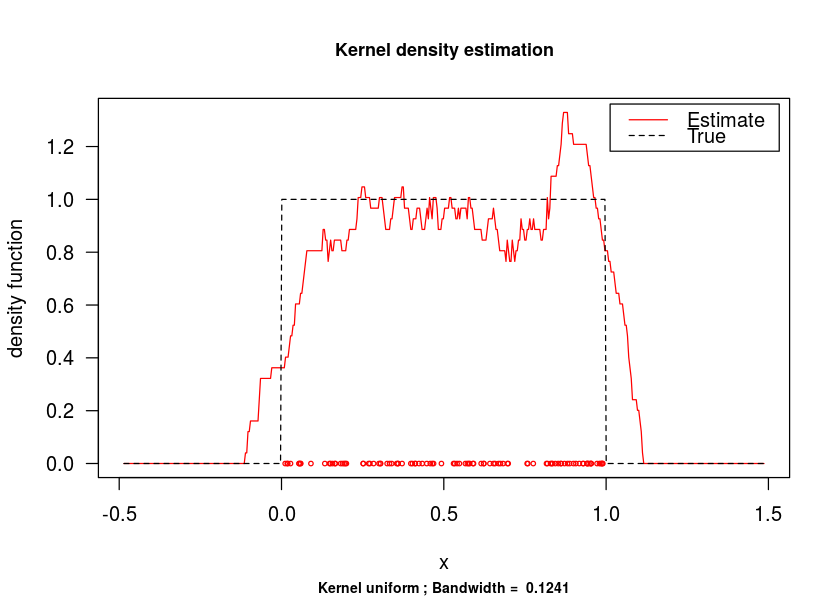

In [58]:
dens.est <- dkde(sample, deriv.order = 0, kernel = 'uniform')
dens.est
plot(dens.est, dunif)
points(sample, rep(0, 100), cex = 0.5, col = 'red')

Один из способов выбора оптимального $h$

In [76]:
h.ucv(sample)
h.ucv(sample, kernel = 'epanechnikov')


Call:		Unbiased Cross-Validation

Derivative order = 0
Data: sample (100 obs.);	Kernel: gaussian
Min UCV = -0.9085693;	Bandwidth 'h' = 0.0573876



Call:		Unbiased Cross-Validation

Derivative order = 0
Data: sample (100 obs.);	Kernel: epanechnikov
Min UCV = -0.9052275;	Bandwidth 'h' = 0.1505246


$kernel
[1] "gaussian"

$deriv.order
[1] 0

$seq.bws
 [1] 0.010 0.015 0.020 0.025 0.030 0.035 0.040 0.045 0.050 0.055 0.060 0.065
[13] 0.070 0.075 0.080 0.085 0.090 0.095 0.100 0.105 0.110 0.115 0.120 0.125
[25] 0.130 0.135 0.140 0.145 0.150 0.155 0.160 0.165 0.170 0.175 0.180 0.185
[37] 0.190 0.195 0.200

$ucv
 [1] -0.6945284 -0.7829687 -0.8355022 -0.8706838 -0.8906727 -0.9005583
 [7] -0.9050480 -0.9070804 -0.9080708 -0.9085181 -0.9084982 -0.9079587
[13] -0.9068591 -0.9052144 -0.9030909 -0.9005861 -0.8978069 -0.8948546
[19] -0.8918156 -0.8887582 -0.8857325 -0.8827722 -0.8798979 -0.8771198
[25] -0.8744405 -0.8718577 -0.8693657 -0.8669569 -0.8646230 -0.8623558
[31] -0.8601470 -0.8579893 -0.8558759 -0.8538008 -0.8517587 -0.8497450
[37] -0.8477556 -0.8457869 -0.8438358

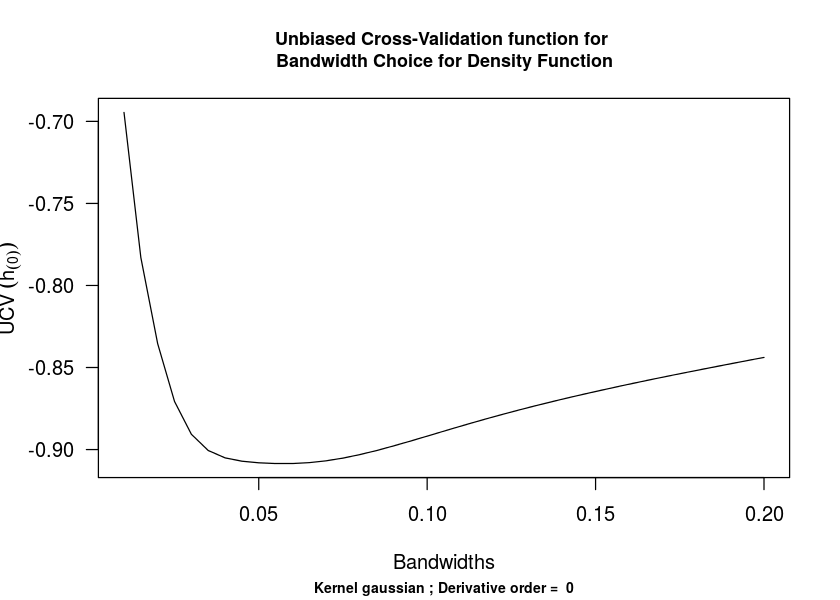

In [75]:
plot(h.ucv(sample), seq.bws = seq(0.01, 0.2, 0.005))

In [78]:
h.ccv(sample)


Call:		Complete Cross-Validation

Derivative order = 0
Data: sample (100 obs.);	Kernel: gaussian
Min CCV = 0.0597103;	Bandwidth 'h' = 0.07755656


$kernel
[1] "gaussian"

$deriv.order
[1] 0

$seq.bws
 [1] 0.010 0.015 0.020 0.025 0.030 0.035 0.040 0.045 0.050 0.055 0.060 0.065
[13] 0.070 0.075 0.080 0.085 0.090 0.095 0.100 0.105 0.110 0.115 0.120 0.125
[25] 0.130 0.135 0.140 0.145 0.150 0.155 0.160 0.165 0.170 0.175 0.180 0.185
[37] 0.190 0.195 0.200 0.205 0.210 0.215 0.220 0.225 0.230 0.235 0.240 0.245
[49] 0.250 0.255 0.260 0.265 0.270 0.275 0.280 0.285 0.290 0.295 0.300 0.305
[61] 0.310 0.315 0.320 0.325 0.330 0.335 0.340 0.345 0.350 0.355 0.360 0.365
[73] 0.370 0.375 0.380 0.385 0.390 0.395 0.400

$ccv
 [1] 0.26943402 0.19572346 0.13047497 0.09861487 0.08937327 0.08780087
 [7] 0.08619106 0.08245482 0.07714528 0.07150530 0.06658330 0.06296180
[13] 0.06077170 0.05982478 0.05977150 0.06023205 0.06087884 0.06147229
[19] 0.06186378 0.06198122 0.06180912 0.06136944 0.06070597 0.05987250
[25] 0.05892458 0.05791399 0.05688562 0.05587593 0.05491273 0.05401571
[31] 0.05319753 0.05246508 0.05182080 0.05126385 0.05079118 0.05039837
[37] 0.05008026 0.04983146 0.04964666 0.04952085 0.04944947 0.04942851
[43] 0.04945449 0.04952451 0.04963623 0.04978785 0.04997804 0.05020596
[49] 0.05047119 0.05077365 0.05111360 0.05149154 0.05190819 0.05236439
[55] 0.05286110 0.05339930 0.05397997 0.05460401 0.05527224 0.05598536
[61] 0.05674388 0.05754813 0.05839825 0.05929417 0.06023558 0.06122196
[67] 0.06225257 0.06332645 0.06444246 0.06559925 0.06679528 0.06802890
[73] 0.06929826 0.07060143 0.07193635 0.07330087 0.07469279 0.07610983
[79] 0.07754970

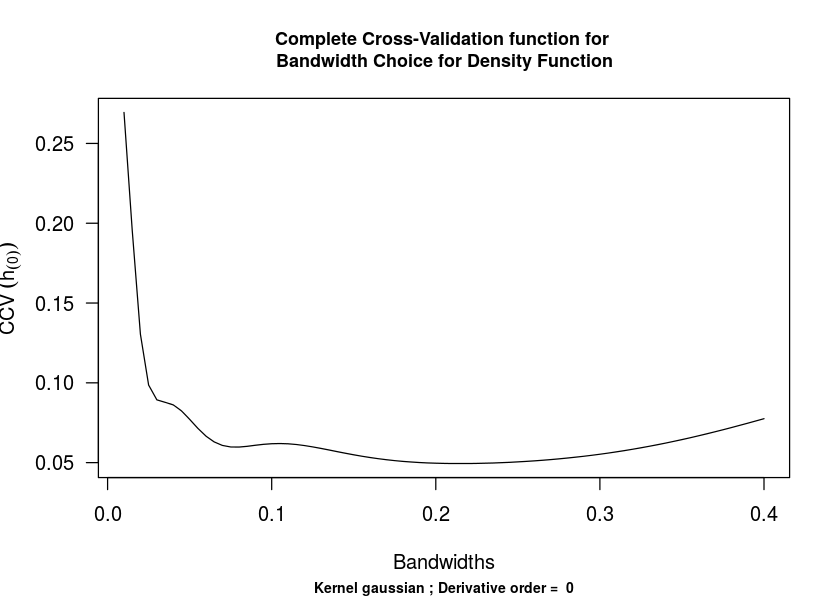

In [80]:
plot(h.ccv(sample), seq.bws = seq(0.01, 0.4, 0.005))

## Ядерная регрессия

Полная документация с примерами https://cran.r-project.org/web/packages/np/vignettes/np.pdf

In [96]:
data("cps71")
cps71[1:5,]

logwage,age
11.1563,21
12.8131,22
13.0960,22
11.6952,22
11.5327,22


Линейная модель (параметрическая)

In [104]:
model.par <- lm(logwage ~ age + I(age^2), data = cps71)
summary(model.par)


Call:
lm(formula = logwage ~ age + I(age^2), data = cps71)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4041 -0.1711  0.0884  0.3182  1.3940 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.0419773  0.4559986  22.022  < 2e-16 ***
age          0.1731310  0.0238317   7.265 7.96e-12 ***
I(age^2)    -0.0019771  0.0002898  -6.822 1.02e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5608 on 202 degrees of freedom
Multiple R-squared:  0.2308,	Adjusted R-squared:  0.2232 
F-statistic:  30.3 on 2 and 202 DF,  p-value: 3.103e-12


Нелинейная

In [101]:
model.np <- npreg(logwage ~ age, data = cps71, regtype = "ll", bwmethod = "cv.aic", gradients = TRUE)
summary(model.np)

                   
Regression Data: 205 training points, in 1 variable(s)
                   age
Bandwidth(s): 2.805308

Kernel Regression Estimator: Local-Linear
Bandwidth Type: Fixed
Residual standard error: 0.5215268
R-squared: 0.3251639

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1



In [103]:
npsigtest.res <- npsigtest(model.np)

Bootstrap replication 1/399 for variable 1 of (1)... Bootstrap replication 2/399 for variable 1 of (1)... Bootstrap replication 3/399 for variable 1 of (1)... Bootstrap replication 4/399 for variable 1 of (1)... Bootstrap replication 5/399 for variable 1 of (1)... Bootstrap replication 6/399 for variable 1 of (1)... Bootstrap replication 7/399 for variable 1 of (1)... Bootstrap replication 8/399 for variable 1 of (1)... Bootstrap replication 9/399 for variable 1 of (1)... Bootstrap replication 10/399 for variable 1 of


Kernel Regression Significance Test
Type I Test with IID Bootstrap (399 replications, Pivot = TRUE, joint = FALSE)
Explanatory variables tested for significance:
age (1)

                   age
Bandwidth(s): 2.805308

Individual Significance Tests
P Value: 
age < 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Графики регрессий и их градиента вместе с доверительным интервалом

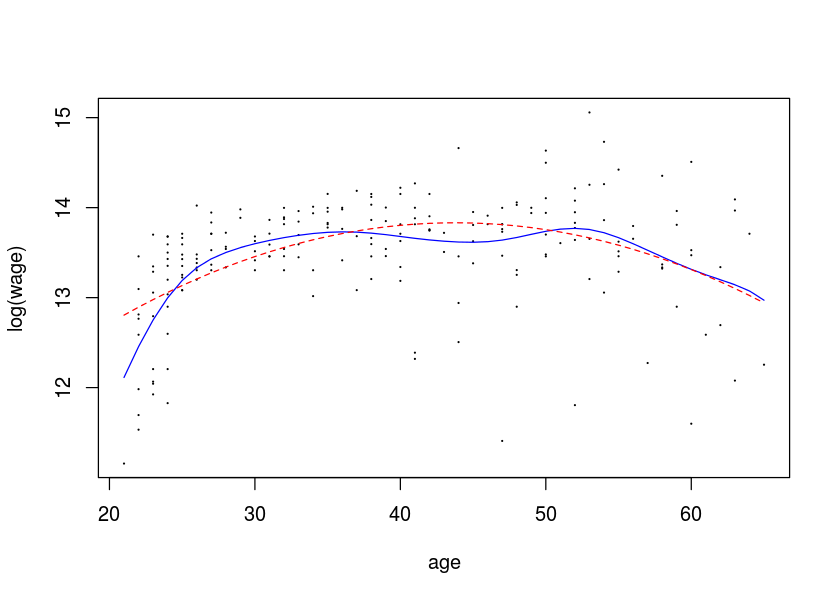

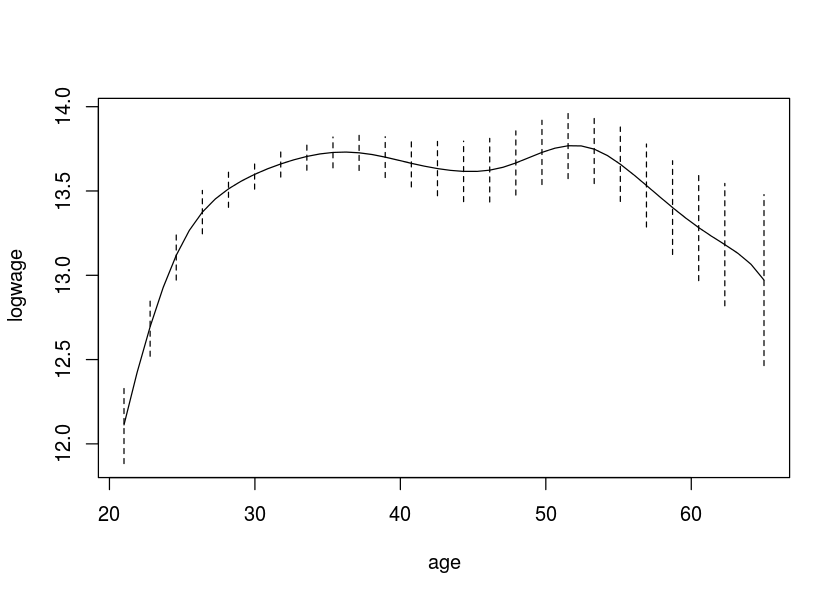

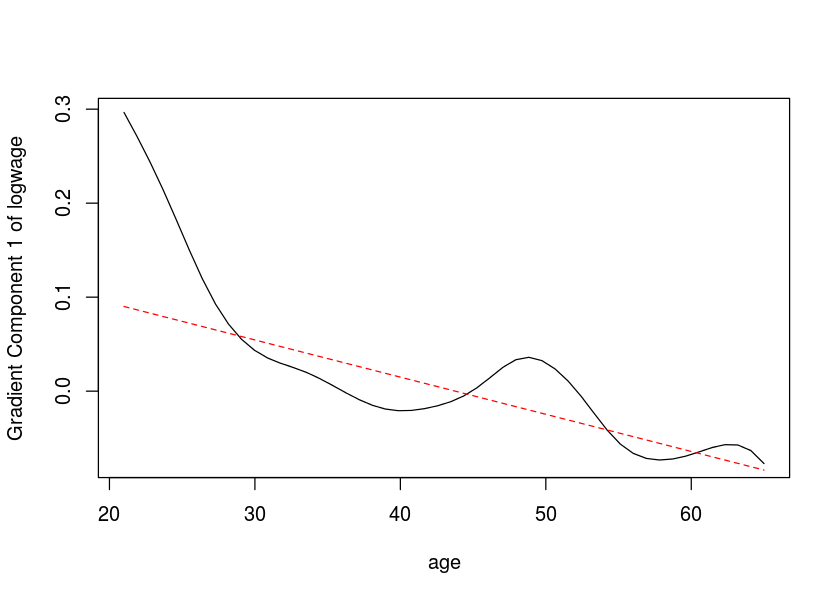

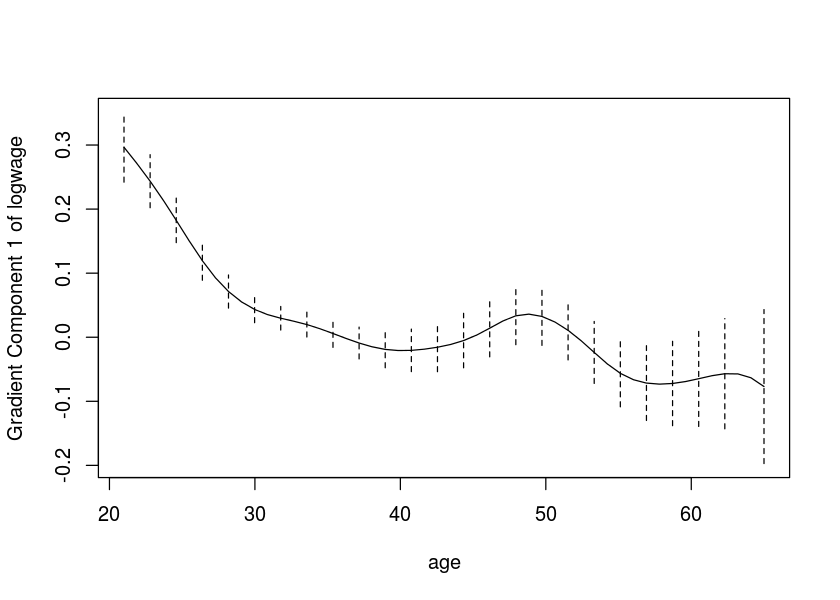

In [105]:
plot(cps71$age, cps71$logwage, xlab = "age", ylab = "log(wage)", cex=.1)
lines(cps71$age, fitted(model.np), lty = 1, col = "blue")
lines(cps71$age, fitted(model.par), lty = 2, col = " red")

plot(model.np, plot.errors.method = "asymptotic")

plot(model.np, gradients = TRUE)
lines(cps71$age, coef(model.par)[2]+2*cps71$age*coef(model.par)[3], lty = 2, col = "red")

plot(model.np, gradients = TRUE, plot.errors.method = "asymptotic")

**Задание:**

Скачать данные о пробеге автомобиля (в милях) на единицу расхода горючего
http://lib.stat.cmu.edu/DASL/Datafiles/carmpgdat.html

**1.**

* Постройте ядерные оценки плотности для переменных HP и MPG. Для гаусоовского ядра исследуйте зависимость оценки от ширины ядра. Подберите оптимальную ширину ядра с помощью некоторого метода. Есть ли существенная зависимость от типа ядра при использовании оптимальной ширины ядра для *данного* типа ядра?

* Постройте ядерную оценку плотности вектора (HP, MPG). Подберите оптимальную ширину ядра.

**2.**

* Постройте ядерную регрессию для предсказания значений MPG от HP. Как результат зависит от типа ядра и его ширины? Сравните с линейной регрессией. В каждом случае сравнение производите с помощью графиков на глаз и по значению MSE, разбив данные на обучающую и тестовую части.

* Постройте ядерную регрессию для предсказания значений MPG от всех остальных переменных. Как результат зависит от типа ядра и его ширины? Сравните с линейной регрессией. Сравнение производите по значению MSE, разбив данные на обучающую и тестовую части.